In [102]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras.models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### EDA

In [46]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [48]:
df.shape

(15039, 11)

In [49]:
df.duplicated().sum()

0

### Standardization

In [50]:
sc = StandardScaler()
standardized_df=sc.fit_transform(df)
df1=pd.DataFrame(standardized_df, columns=df.columns)

In [51]:
df1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


### Feature Scaling

In [56]:
x = df1.iloc[:,[0,1,2,3,4,5,6,8,9,10]]

In [53]:
y = df1['TEY']

In [54]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [55]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

### Splitting the data

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Creating model

In [113]:
#Intialize ANN model(it will create i/p layer and also assign weights)

ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='relu'))

ann.add(Dense(units=20,activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='mse')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250)

Epoch 1/250
376/376 [==============================] - 2s 3ms/step - loss: 0.0504 - val_loss: 0.0064
Epoch 2/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 3/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 5/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 6/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 7/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 8/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 9/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0016 - val_lo

Epoch 157/250
376/376 [==============================] - 1s 3ms/step - loss: 8.4998e-04 - val_loss: 0.0011
Epoch 158/250
376/376 [==============================] - 1s 3ms/step - loss: 8.4865e-04 - val_loss: 0.0011
Epoch 159/250
376/376 [==============================] - 1s 3ms/step - loss: 8.7147e-04 - val_loss: 0.0013
Epoch 160/250
376/376 [==============================] - 1s 2ms/step - loss: 8.5782e-04 - val_loss: 0.0011
Epoch 161/250
376/376 [==============================] - 1s 3ms/step - loss: 8.8049e-04 - val_loss: 0.0011
Epoch 162/250
376/376 [==============================] - 1s 3ms/step - loss: 8.5604e-04 - val_loss: 0.0011
Epoch 163/250
376/376 [==============================] - 1s 3ms/step - loss: 8.3955e-04 - val_loss: 0.0011
Epoch 164/250
376/376 [==============================] - 1s 3ms/step - loss: 8.3291e-04 - val_loss: 0.0012
Epoch 165/250
376/376 [==============================] - 1s 3ms/step - loss: 8.8829e-04 - val_loss: 0.0012
Epoch 166/250
376/376 [==============

<AxesSubplot:>

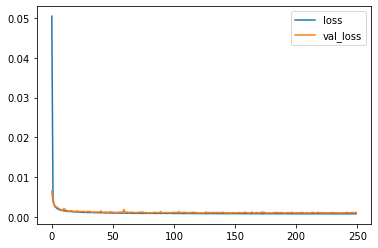

In [114]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [115]:
#Evaluate the model

ypred =ann.predict(xtest)
ypred

94/94 [==============================] - 0s 2ms/step


array([[ 1.9372559 ],
       [ 0.34121758],
       [-1.5734699 ],
       ...,
       [ 1.4480653 ],
       [ 0.03083192],
       [ 1.9855568 ]], dtype=float32)

### Hyperparameter Tuning

In [117]:
#Early Stopping

early = EarlyStopping(monitor='loss',mode='min', patience=25)

In [121]:
ann1 = Sequential()

ann1.add(Dense(units=30, activation='relu'))
ann1.add(Dense(units=20, activation='relu'))
ann1.add(Dense(units=1))
ann1.compile(optimizer='adam',loss='mse')

ann1.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
376/376 [==============================] - 2s 3ms/step - loss: 0.0941 - val_loss: 0.0112
Epoch 2/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 3/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 4/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 5/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 6/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 7/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 8/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 9/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 10/250
376/376 [==============================] - 1s 3ms/step - loss: 0.0019 - val_lo

Epoch 81/250
376/376 [==============================] - 1s 3ms/step - loss: 9.8319e-04 - val_loss: 0.0012
Epoch 82/250
376/376 [==============================] - 1s 3ms/step - loss: 9.7625e-04 - val_loss: 0.0011
Epoch 83/250
376/376 [==============================] - 1s 3ms/step - loss: 9.7612e-04 - val_loss: 0.0012
Epoch 84/250
376/376 [==============================] - 1s 4ms/step - loss: 9.5136e-04 - val_loss: 0.0013
Epoch 85/250
376/376 [==============================] - 2s 5ms/step - loss: 9.8933e-04 - val_loss: 0.0012
Epoch 86/250
376/376 [==============================] - 1s 3ms/step - loss: 9.8954e-04 - val_loss: 0.0013
Epoch 87/250
376/376 [==============================] - 1s 4ms/step - loss: 9.7551e-04 - val_loss: 0.0012
Epoch 88/250
376/376 [==============================] - 1s 4ms/step - loss: 9.8172e-04 - val_loss: 0.0012
Epoch 89/250
376/376 [==============================] - 1s 4ms/step - loss: 9.6437e-04 - val_loss: 0.0011
Epoch 90/250
376/376 [========================

376/376 [==============================] - 2s 5ms/step - loss: 8.1640e-04 - val_loss: 0.0011
Epoch 234/250
376/376 [==============================] - 2s 4ms/step - loss: 8.6848e-04 - val_loss: 0.0011
Epoch 235/250
376/376 [==============================] - 1s 4ms/step - loss: 8.3490e-04 - val_loss: 0.0011
Epoch 236/250
376/376 [==============================] - 1s 3ms/step - loss: 8.0889e-04 - val_loss: 0.0012
Epoch 237/250
376/376 [==============================] - 1s 3ms/step - loss: 8.5340e-04 - val_loss: 0.0012
Epoch 238/250
376/376 [==============================] - 1s 4ms/step - loss: 8.3389e-04 - val_loss: 0.0011
Epoch 239/250
376/376 [==============================] - 1s 3ms/step - loss: 8.2432e-04 - val_loss: 0.0012
Epoch 240/250
376/376 [==============================] - 1s 4ms/step - loss: 8.3133e-04 - val_loss: 0.0011
Epoch 241/250
376/376 [==============================] - 1s 3ms/step - loss: 8.0228e-04 - val_loss: 0.0011
Epoch 242/250
376/376 [============================

<AxesSubplot:>

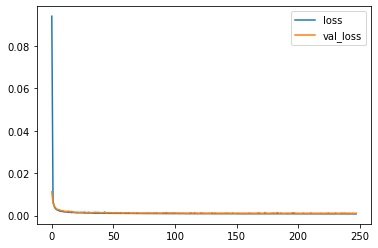

In [122]:
early_loss = pd.DataFrame(ann1.history.history)

early_loss.plot()

In [125]:
#Dropout Layer

ann2 = Sequential()

ann2.add(Dense(units=30, activation='relu'))
ann2.add(Dropout(rate=0.5))

ann2.add(Dense(units=20, activation='relu'))
ann2.add(Dropout(rate=0.5))

ann2.add(Dense(units=1))
ann2.compile(optimizer='adam',loss='mse')
ann2.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 250)

Epoch 1/250
376/376 [==============================] - 3s 4ms/step - loss: 0.5543 - val_loss: 0.1080
Epoch 2/250
376/376 [==============================] - 2s 5ms/step - loss: 0.2740 - val_loss: 0.1382
Epoch 3/250
376/376 [==============================] - 2s 4ms/step - loss: 0.2182 - val_loss: 0.0886
Epoch 4/250
376/376 [==============================] - 1s 4ms/step - loss: 0.2034 - val_loss: 0.0790
Epoch 5/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1871 - val_loss: 0.0848
Epoch 6/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1816 - val_loss: 0.0843
Epoch 7/250
376/376 [==============================] - 1s 4ms/step - loss: 0.1737 - val_loss: 0.0502
Epoch 8/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1617 - val_loss: 0.0543
Epoch 9/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1640 - val_loss: 0.0409
Epoch 10/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1569 - val_lo

Epoch 161/250
376/376 [==============================] - 1s 4ms/step - loss: 0.1196 - val_loss: 0.0214
Epoch 162/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1201 - val_loss: 0.0251
Epoch 163/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1166 - val_loss: 0.0277
Epoch 164/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1170 - val_loss: 0.0314
Epoch 165/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1186 - val_loss: 0.0288
Epoch 166/250
376/376 [==============================] - 1s 3ms/step - loss: 0.1198 - val_loss: 0.0408
Epoch 167/250
376/376 [==============================] - 1s 4ms/step - loss: 0.1206 - val_loss: 0.0188
Epoch 168/250
376/376 [==============================] - 2s 5ms/step - loss: 0.1176 - val_loss: 0.0313
Epoch 169/250
376/376 [==============================] - 2s 6ms/step - loss: 0.1183 - val_loss: 0.0335
Epoch 170/250
376/376 [==============================] - 2s 4ms/step - lo

<AxesSubplot:>

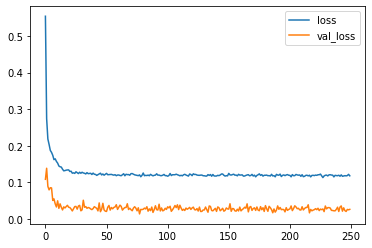

In [126]:
drop_loss = pd.DataFrame(ann2.history.history)
drop_loss.plot()

In [127]:
#Early Stopping + Dropout Layer

ann3 = Sequential()

ann3.add(Dense(units=30, activation='relu'))
ann3.add(Dropout(rate=0.5))

ann3.add(Dense(units=20, activation='relu'))
ann3.add(Dropout(rate=0.5))

ann3.add(Dense(units=1))
ann3.compile(optimizer='adam',loss='mse')
ann3.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 250)


Epoch 1/250
376/376 [==============================] - 3s 5ms/step - loss: 0.5985 - val_loss: 0.1720
Epoch 2/250
376/376 [==============================] - 2s 5ms/step - loss: 0.2916 - val_loss: 0.1265
Epoch 3/250
376/376 [==============================] - 2s 6ms/step - loss: 0.2362 - val_loss: 0.1075
Epoch 4/250
376/376 [==============================] - 2s 5ms/step - loss: 0.2086 - val_loss: 0.0800
Epoch 5/250
376/376 [==============================] - 2s 5ms/step - loss: 0.1934 - val_loss: 0.0954
Epoch 6/250
376/376 [==============================] - 2s 5ms/step - loss: 0.1812 - val_loss: 0.0859
Epoch 7/250
376/376 [==============================] - 2s 4ms/step - loss: 0.1671 - val_loss: 0.0701
Epoch 8/250
376/376 [==============================] - 1s 4ms/step - loss: 0.1694 - val_loss: 0.0737
Epoch 9/250
376/376 [==============================] - 1s 4ms/step - loss: 0.1588 - val_loss: 0.0459
Epoch 10/250
376/376 [==============================] - 1s 4ms/step - loss: 0.1551 - val_lo

<AxesSubplot:>

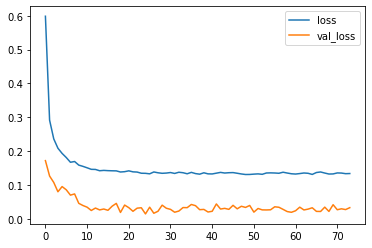

In [128]:
de_loss = pd.DataFrame(ann3.history.history)
de_loss.plot()

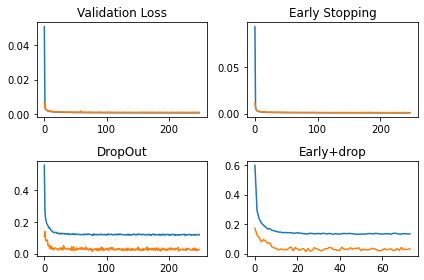

In [130]:
plt.subplot(2,2,1)
plt.plot(loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()